In [10]:
# Import des librairies
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd

# Import du dataset

df = pd.read_excel("superstore.xls")

In [5]:
# Préparation des données

""" Création d'un objet "furniture" qui contient toutes les lignes de la variable Category égales à "furniture" """

furniture = df.loc[df['Category'] == "Furniture"]

""" On Conserve uniquement les colonnes ‘Order Date’ et ‘Sales’ dans le dataset furniture"""

furniture = furniture.loc[:,['Order Date','Sales']]

""" Classement par ordre croissant des dates via .sort_values"""

furniture = furniture.sort_values(by=['Order Date'], ascending=True)

""" Calcul la somme des ventes par jour """
 
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

""" Transformation des dates en index du dataset """

furniture = furniture.set_index('Order Date')

""" Calcul des ventes moyenne par mois """

y = furniture['Sales'].resample('MS').mean()

In [6]:
y.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
Freq: MS, Name: Sales, dtype: float64

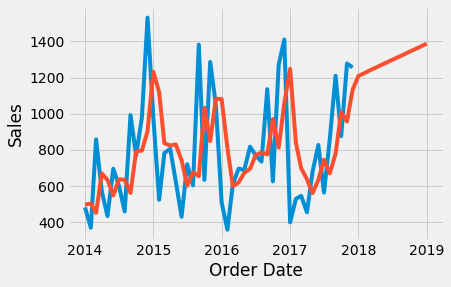

In [7]:
'''Prédiction avec lissage exponentiel double'''

from statsmodels.tsa.holtwinters import ExponentialSmoothing
DES = ExponentialSmoothing(y, trend = 'add')
DES_fit = DES.fit(smoothing_level=0.5)
DES_predict = DES_fit.predict(start=0, end = 60)
sns.lineplot(x = y.index, y = y )
sns.lineplot(x = DES_predict.index, y = DES_predict )

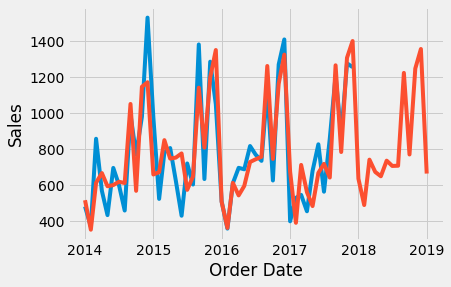

In [19]:
'''Prédiction avec lissage exponentiel + saisonnalité '''
from statsmodels.tsa.holtwinters import ExponentialSmoothing
TES = ExponentialSmoothing(y, trend = 'add', seasonal = 'add', seasonal_periods = 12)
TES_fit = TES.fit(smoothing_level=0.5)
TES_predict = TES_fit.predict(start=0, end = 60)
sns.lineplot(x = y.index, y = y)
sns.lineplot(x = TES_predict.index, y = TES_predict)